<a href="https://colab.research.google.com/github/M0E313/time-series-forcasting/blob/main/TimeSeriesUsingDarts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time Series Made Easy in Python USing Darts Library

In [ ]:
!pip install darts

     |████████████████████████████████| 253 kB 31.4 MB/s 
     |████████████████████████████████| 65 kB 4.3 MB/s 
     |████████████████████████████████| 804.1 MB 2.6 kB/s 
     |████████████████████████████████| 10.3 MB 40.8 MB/s 
     |████████████████████████████████| 788 kB 60.5 MB/s 
     |████████████████████████████████| 9.9 MB 40.3 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 62 kB 850 kB/s 
     |████████████████████████████████| 9.5 MB 30.7 MB/s 
     |████████████████████████████████| 177 kB 50.8 MB/s 
     |████████████████████████████████| 142 kB 59.0 MB/s 
     |████████████████████████████████| 1.4 MB 40.2 MB/s 
     |████████████████████████████████| 28.5 MB 1.6 MB/s 
     |████████████████████████████████| 2.0 MB 26.8 MB/s 
     |████████████████████████████████| 370 kB 57.1 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 214 kB 60.5 MB/s 
  Created wheel fo

In [ ]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

In [ ]:
AirPassengersDataset().load().pd_series()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Length: 144, dtype: float64

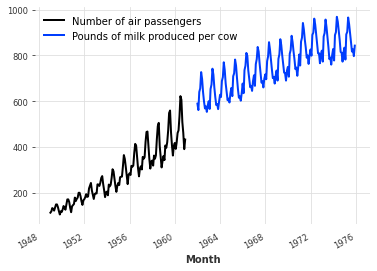

In [ ]:
import matplotlib.pyplot as plt
series_air = AirPassengersDataset().load()
series_milk = MonthlyMilkDataset().load()

series_air.plot(label='Number of air passengers')
series_milk.plot(label='Pounds of milk produced per cow')
plt.legend();

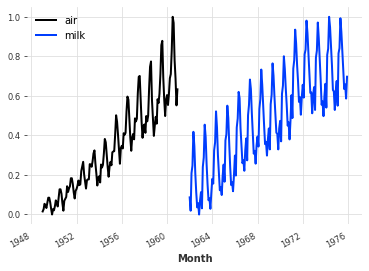

In [ ]:
from darts.dataprocessing.transformers import Scaler
scaler_air, scaler_milk = Scaler(), Scaler()
series_air_scaled = scaler_air.fit_transform(series_air)
series_milk_scaled = scaler_milk.fit_transform(series_milk)

series_air_scaled.plot(label='air')
series_milk_scaled.plot(label='milk')
plt.legend();

In [ ]:
# Train And Validation Split
train_air, val_air = series_air_scaled[:-36], series_air_scaled[-36:]
train_milk, val_milk = series_milk_scaled[:-36], series_milk_scaled[-36:]

In [ ]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape

In [ ]:
model_air_milk = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0)

In [ ]:
model_air_milk.fit([train_air, train_milk], verbose=True)

[2021-09-25 15:21:01,468] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2021-09-25 15:21:01,468] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2021-09-25 15:21:01,587] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-09-25 15:21:01,587] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
  1%|          | 1/100 [00:02<03:40,  2.22s/it]

 11%|█         | 11/100 [00:22<02:52,  1.94s/it]

 21%|██        | 21/100 [00:41<02:34,  1.96s/it]

 31%|███       | 31/100 [01:01<02:12,  1.92s/it]

 41%|████      | 41/100 [01:20<01:53,  1.93s/it]

 51%|█████     | 51/100 [01:39<01:36,  1.98s/it]

 61%|██████    | 61/100 [01:59<01:18,  2.01s/it]

 71%|███████   | 71/100 [02:18<00:53,  1.84s/it]

 81%|████████  | 81/100 [02:36<00:35,  1.86s/it]

 91%|█████████ | 91/100 [02:55<00:16,  1.84s/it]

100%|██████████| 100/100 [03:11<00:00,  1.92s/it]


MAPE = 8.13%


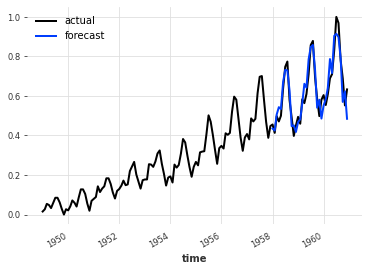

In [ ]:
pred = model_air_milk.predict(n=36, series=train_air)

series_air_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print('MAPE = {:.2f}%'.format(mape(series_air_scaled, pred)))

MAPE = 13.84%


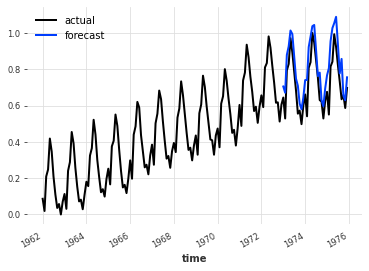

In [ ]:
pred = model_air_milk.predict(n=36, series=train_milk)

series_milk_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print('MAPE = {:.2f}%'.format(mape(series_milk_scaled, pred)))